In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [8]:
df = pd.read_csv('91app_features.txt')

In [9]:
df.columns 

Index(['memberid', 'online_ratio', 'total_day_using_percentage',
       'actually_using_percentage', 'view_per_date', 'view_per_session',
       'session_per_date', 'total_conversion_rate',
       'converion_rate_without_offline_return', 'off_cart_c', 'off_fav_c',
       'off_view_c', 'on_cart_c', 'on_fav_c', 'on_view_c', 'total_cart_c',
       'total_fav_c', 'total_view_c', 'viewtime_ave', 'view_time_med',
       '201803F', '201804F', '201805F', '201806F', '201807F', '201808F',
       '201809F', '201810F', '201811F', '201812F', '201901F', '201902F',
       '201903F', '201904F', '201803M', '201804M', '201805M', '201806M',
       '201807M', '201808M', '201809M', '201810M', '201811M', '201812M',
       '201901M', '201902M', '201903M', '201904M', '201803S', '201804S',
       '201805S', '201806S', '201807S', '201808S', '201809S', '201810S',
       '201811S', '201812S', '201901S', '201902S', '201903S', '201904S',
       'total_F', 'total_M', 'total_S', 'ave_M', 'ave_M_not_offline_return',
 

In [10]:
df

,memberid,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,view_per_session,session_per_date,total_conversion_rate,converion_rate_without_offline_return,off_cart_c,...,session_number,off_mix_c,on_mix_c,total_mix_c,cart_med_time,cart_ave_time,cart_within_3,cart_within_24,view_count_med,view_count_ave
0,23722,NaN,0.002849,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44751,NaN,0.022923,0.026846,3.875000,2.583333,1.500000,0.000000,0.000000,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66732,NaN,0.027160,0.108911,4.363636,4.000000,1.090909,0.000000,0.000000,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108059,NaN,0.003058,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,257559,NaN,0.006061,0.250000,1.500000,1.500000,1.000000,0.000000,0.000000,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,314792,NaN,0.006116,0.016529,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,394660,NaN,0.012019,0.016129,1.600000,1.600000,1.000000,0.000000,0.000000,NaN,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,437828,NaN,0.002770,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,439730,NaN,0.002817,1.000000,3.000000,1.500000,2.000000,0.000000,0.000000,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,519517,NaN,0.002488,1.000000,4.000000,4.000000,1.000000,0.000000,0.000000,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(76401, 82)

In [12]:
df['cart_within_24'].describe() #我的天啊 全部都是一天內都會購買

count    18015.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: cart_within_24, dtype: float64

# inactive users are those whose total_day_using_percentage < 2%

In [13]:
df_inactive = df[df['total_day_using_percentage'] < 0.02]
df_active =   df[~(df['total_day_using_percentage'] < 0.02)]

In [14]:
df_inactive.shape[0], df_active.shape[0]

(25676, 50725)

# offline buyer are those who purchases only offline

In [15]:
df_never_buy = df_active[df_active['online_ratio'].isnull()]
df_buy = df_active[~df_active['online_ratio'].isnull()]

In [16]:
df_never_buy.shape, df_buy.shape

((14429, 82), (36296, 82))

In [17]:
def split_by_percentile(df, keyword, n):
    a_list = df[keyword].tolist()
    null_df = df[df[keyword].isnull()]
    remaining_df = df[~df[keyword].isnull()]
    return_list = []
    number_list = []
    for i in range(1, n):
        number = np.nanpercentile(a_list, int(100/n*i) )
        number_list.append(number)
        a_df = remaining_df[ remaining_df[keyword] <= number]
        remaining_df = remaining_df[~ (remaining_df[keyword] <= number)]      
        return_list.append(a_df)
    return_list.append(remaining_df)
    return return_list, number_list, null_df

In [18]:
df1 = df_buy[df_buy['online_ratio_without_offline_return'] <= 0.2]
df2 = df_buy[df_buy['online_ratio_without_offline_return'] > 0.2]

In [19]:
df_drop = df_buy[df_buy['online_ratio_without_offline_return'].isnull()] #因為他們只在線下退換貨記錄 沒買過東西

In [20]:
df1.shape[0] , df2.shape[0], df_drop.shape[0]

(21804, 13535, 957)

In [21]:
def difference_in_rate(df1, df2, key_word):
    
    newdf1, newdf2 = df1[~df1[key_word].isnull()],  df2[~df2[key_word].isnull()]
    n1, n2 = newdf1.shape[0] , newdf2.shape[0]
    if n1 == 0 or n2 == 0:
        return (0,0)
    
    m1, m2 = np.nanmean( newdf1[key_word].tolist() ), np.nanmean( newdf2[key_word].tolist() )
    s1, s2 = np.nanstd(newdf1[key_word].tolist()), np.nanstd(newdf2[key_word].tolist())
    differnce = m1 - m2
    
    sp2 = ((n1-1)*(s1**2) + (n2-1)*(s2**2)) / (n1+n2-2)
    t = differnce / sqrt(sp2 * (1/n1+1/n2))
    return differnce, t

In [22]:
def find_important_difference(df1, df2):
    for key_word in ['converion_rate_without_offline_return', 'total_conversion_rate','ave_M', 'ave_M_not_offline_return', 'total_M', 'total_F', 'total_S', 'session_number', 'buy_time_without_offline_return','total_day_using_percentage', 'actually_using_percentage', 'view_per_date', 'view_per_session',
       'session_per_date', 'off_return_item_number', 'off_return_frequency', 
       'off_cart_c', 'off_fav_c', 'off_view_c', 'on_cart_c', 'on_fav_c',
       'on_view_c', 'total_cart_c', 'total_fav_c', 'total_view_c',
       'viewtime_ave', 'view_time_med', 'total_discount_percentage', 'online_ratio', 'online_ratio_without_offline_return', 'off_mix_c',
       'on_mix_c', 'total_mix_c', 'cart_med_time', 'cart_ave_time',
       'cart_within_3', 'cart_within_24', 'view_count_med', 'view_count_ave']:
        differnce, t = difference_in_rate(df1, df2, key_word)
        if abs( t ) > 1.96:
            print(key_word, round(differnce, 4)  )
        elif  abs( t ) >= 1.5:
            print(key_word, round(differnce, 4) ,  'Not so significant' )

In [23]:
def find_important_difference_all(df1, df2):
    for key_word in ['converion_rate_without_offline_return', 'total_conversion_rate','ave_M', 'ave_M_not_offline_return', 'total_M', 'total_F', 'total_S', 'session_number', 'buy_time_without_offline_return','total_day_using_percentage', 'actually_using_percentage', 'view_per_date', 'view_per_session',
       'session_per_date', 'off_return_item_number', 'off_return_frequency', 
       'off_cart_c', 'off_fav_c', 'off_view_c', 'on_cart_c', 'on_fav_c',
       'on_view_c', 'total_cart_c', 'total_fav_c', 'total_view_c',
       'viewtime_ave', 'view_time_med', 'total_discount_percentage', 'online_ratio', 'online_ratio_without_offline_return', 'off_mix_c',
       'on_mix_c', 'total_mix_c', 'cart_med_time', 'cart_ave_time',
       'cart_within_3', 'cart_within_24', 'view_count_med', 'view_count_ave']:
        differnce, t = difference_in_rate(df1, df2, key_word)
        if abs( t ) > 1.96:
            print(key_word, round(differnce, 4)  )
        elif  abs( t ) >= 1.5:
            print(key_word, round(differnce, 4) ,  'Not so significant' )
        else:
            print(key_word, round(differnce, 4) ,  'Not significant' )

In [24]:
 find_important_difference(df1, df2)

converion_rate_without_offline_return 0.2258
total_conversion_rate 0.2625
ave_M 630.057
ave_M_not_offline_return 832.6407
total_M 2723.1448
total_F 0.5703
total_S -328.0011
session_number -51.5379
buy_time_without_offline_return 0.1441
total_day_using_percentage -0.0577
actually_using_percentage 0.0179
view_per_date -2.8865
view_per_session -1.8229
session_per_date -0.1354
off_return_item_number 0.4775
off_return_frequency 0.4262
off_fav_c -0.0124
on_cart_c 0.1322
on_fav_c 0.0727
on_view_c 0.0728
total_cart_c -0.3243
total_fav_c -0.0782
total_view_c -0.0655
viewtime_ave 3.2647
view_time_med 4.8789
total_discount_percentage 0.005
online_ratio -0.7815
online_ratio_without_offline_return -0.7942
off_mix_c -0.0126
on_mix_c 0.1167
total_mix_c -0.3285
cart_med_time 18718.0155
cart_ave_time 17068.7963
cart_within_3 -0.3195
view_count_med -0.9525
view_count_ave -1.0455


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


# df1是 offline, df2 是online, df3, df4, df5 依照view conversion rate劃分

In [25]:
np.nanpercentile(df['total_view_c'], 33), np.nanpercentile(df['total_view_c'], 67), '此可看出要把inactive user分開的重要性'

(0.008075642857142872, 0.0656, '此可看出要把inactive user分開的重要性')

In [26]:
[df3, df4, df5], number_list2, null_df2 = split_by_percentile(df2, 'total_view_c', 3)

In [27]:
df3.shape , df4.shape , df5.shape  , number_list2, null_df2.shape

((4497, 82), (4421, 82), (4594, 82), [0.04, 0.09555259999999999], (23, 82))

In [28]:
 find_important_difference(df3, df5)

converion_rate_without_offline_return -0.1043
total_conversion_rate -0.1078
ave_M -316.056
ave_M_not_offline_return -317.1675
total_M -4518.1208
total_F -0.9893
total_S 435.5347
session_number 67.5933
buy_time_without_offline_return -0.9743
total_day_using_percentage 0.0985
actually_using_percentage 0.0567
view_per_date 1.8443
view_per_session 0.9569
session_per_date 0.0941
off_cart_c -0.0934
off_fav_c -0.0512
off_view_c -0.0967
on_cart_c -0.3215
on_fav_c -0.1361
on_view_c -0.2512
total_cart_c -0.3291
total_fav_c -0.125
total_view_c -0.2323
viewtime_ave -7.8972
view_time_med -8.1997
total_discount_percentage 0.0116
online_ratio -0.0537
online_ratio_without_offline_return -0.0511
off_mix_c -0.0932
on_mix_c -0.365
total_mix_c -0.3653
cart_med_time 4810.1133
cart_ave_time 4471.6021
cart_within_3 -0.0899
view_count_med 1.6264
view_count_ave 1.655


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [29]:
 find_important_difference(df3, df4)

converion_rate_without_offline_return -0.0208
total_conversion_rate -0.0213
ave_M -303.9562
ave_M_not_offline_return -300.196
total_M -4801.0222
total_F -1.3039
total_S 192.4816
session_number 24.6455
buy_time_without_offline_return -1.2486
total_day_using_percentage 0.0356
actually_using_percentage 0.031
view_per_date 0.839
view_per_session 0.472
session_per_date 0.029
off_return_item_number -0.0638
off_return_frequency -0.0553
off_cart_c -0.0534
off_fav_c -0.048
off_view_c -0.0276
on_cart_c -0.1508
on_fav_c -0.0572
on_view_c -0.046
total_cart_c -0.1476
total_fav_c -0.053
total_view_c -0.0416
viewtime_ave -2.0993
view_time_med -1.7038
total_discount_percentage 0.0076
online_ratio -0.0195
online_ratio_without_offline_return -0.0183
off_mix_c -0.0517
on_mix_c -0.1618
total_mix_c -0.1554
cart_med_time 2244.8885
cart_ave_time 1182.0008
cart_within_3 -0.0218
view_count_med 0.9568
view_count_ave 0.9135


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [30]:
 find_important_difference(df4, df5)

converion_rate_without_offline_return -0.0835
total_conversion_rate -0.0865
total_F 0.3146
total_S 243.0531
session_number 42.9478
buy_time_without_offline_return 0.2743
total_day_using_percentage 0.0629
actually_using_percentage 0.0257
view_per_date 1.0054
view_per_session 0.4849
session_per_date 0.0651
off_return_item_number 0.0404
off_return_frequency 0.0403
off_cart_c -0.04
off_view_c -0.0691
on_cart_c -0.1708
on_fav_c -0.0789
on_view_c -0.2053
total_cart_c -0.1815
total_fav_c -0.072
total_view_c -0.1907
viewtime_ave -5.7978
view_time_med -6.4958
total_discount_percentage 0.004
online_ratio -0.0342
online_ratio_without_offline_return -0.0328
off_mix_c -0.0415
on_mix_c -0.2032
total_mix_c -0.2099
cart_med_time 2565.2249
cart_ave_time 3289.6013
cart_within_3 -0.0681
view_count_med 0.6696
view_count_ave 0.7415


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


## 可得知，用view_conversion_rate分群之後，df3為深思熟慮型, df5為衝動購物型

## PRICE 敏感者

In [31]:
import matplotlib.pyplot as plt

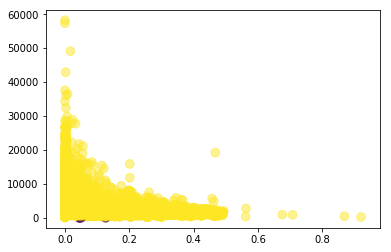

In [35]:
Y = df['ave_M']
X = df['total_discount_percentage']
T = np.arctan2(Y,X) # for color value
plt.scatter(X, Y, s=75,c=T, alpha=.5)

plt.show()



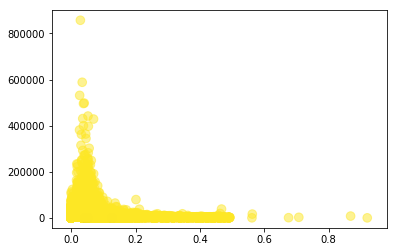

In [36]:
Y = df['total_M']
X = df['total_discount_percentage']
T = np.arctan2(Y,X) # for color value
plt.scatter(X, Y, s=75,c=T, alpha=.5)
plt.show()

# 想看一下price_sensitive 對各個group的影響

In [37]:
def look_the_effect_of_price_sensitive(df, p = 0.1):
    other_sensitive = df[df['total_discount_percentage'] >=p]
    other_normal = df[df['total_discount_percentage'] < p]
    print( find_important_difference(other_sensitive, other_normal) )

In [38]:
look_the_effect_of_price_sensitive(df1)

converion_rate_without_offline_return -0.067
total_conversion_rate -0.0782
ave_M -1048.197
ave_M_not_offline_return -1202.288
total_M -6578.1091
total_F -1.0153
total_S 11.8281 Not so significant
session_number 4.6849
buy_time_without_offline_return -0.8703
total_day_using_percentage -0.0094
actually_using_percentage -0.0183
view_per_session -0.1097 Not so significant
session_per_date 0.028
off_return_item_number -0.1845
off_return_frequency -0.145
off_cart_c -0.0345
off_view_c -0.0094
on_view_c -0.0418 Not so significant
total_cart_c -0.0684
total_view_c -0.0109
viewtime_ave 3.4797
view_time_med 1.5904 Not so significant
total_discount_percentage 0.1531
off_mix_c -0.0267
total_mix_c -0.0479
cart_med_time 2380.7779 Not so significant
cart_within_3 -0.0528
None


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [39]:
look_the_effect_of_price_sensitive(df3)

ave_M -669.1478
ave_M_not_offline_return -701.3459
total_M -2017.8737
total_S -58.4754 Not so significant
view_per_date -0.3405 Not so significant
view_per_session -0.2684 Not so significant
total_view_c -0.0008 Not so significant
viewtime_ave 2.3555
total_discount_percentage 0.1492
online_ratio -0.0581
online_ratio_without_offline_return -0.051
total_mix_c -0.0227
cart_med_time -1192.3344 Not so significant
None


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [40]:
look_the_effect_of_price_sensitive(df4)

converion_rate_without_offline_return 0.0056 Not so significant
total_conversion_rate 0.0076
ave_M -816.5092
ave_M_not_offline_return -843.6505
total_M -4908.5528
total_F -0.4268 Not so significant
total_S -84.8243
session_number -7.9026 Not so significant
buy_time_without_offline_return -0.4957
total_day_using_percentage -0.0136 Not so significant
view_per_date -0.6497
view_per_session -0.3108
session_per_date -0.0344
off_return_item_number 0.0812 Not so significant
off_return_frequency 0.0689 Not so significant
total_cart_c -0.0209 Not so significant
total_view_c -0.0014
total_discount_percentage 0.1467
online_ratio -0.0748
online_ratio_without_offline_return -0.0655
on_mix_c -0.037
total_mix_c -0.0476
cart_within_3 0.0237 Not so significant
view_count_med 0.1968 Not so significant
view_count_ave 0.1887 Not so significant
None


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [41]:
look_the_effect_of_price_sensitive(df5)

converion_rate_without_offline_return 0.0359
total_conversion_rate 0.0369
ave_M -966.7364
ave_M_not_offline_return -998.4339
total_M -6749.0223
total_F -1.1052
total_S -57.7643
session_number -7.248
buy_time_without_offline_return -1.1005
actually_using_percentage 0.0303
view_per_date -0.6943
view_per_session -0.3976
session_per_date -0.038
off_fav_c -0.0585
on_cart_c 0.0268
on_view_c 0.0758
total_view_c 0.0679
view_time_med 2.5592 Not so significant
total_discount_percentage 0.1431
online_ratio -0.0356
online_ratio_without_offline_return -0.023 Not so significant
cart_ave_time -1037.6839 Not so significant
cart_within_3 0.0227 Not so significant
None


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


## 價格敏感的(大於4.6%折扣比率)的衝動購買者，他們看的次數比較多(卻轉換率也比較高)

* 價格敏感的衝動購買者

In [42]:
np.nanpercentile(df5['total_discount_percentage'], 67)

0.045875397739231646

In [43]:
find_important_difference_all(df5[df5['total_discount_percentage'] >= 0.046], df5[df5['total_discount_percentage'] < 0.046])

converion_rate_without_offline_return 0.0354
total_conversion_rate 0.0384
ave_M -624.7669
ave_M_not_offline_return -626.6557
total_M 2938.3914
total_F 1.8225
total_S 87.5151
session_number 16.6812
buy_time_without_offline_return 1.657
total_day_using_percentage 0.0359
actually_using_percentage 0.0548
view_per_date -0.2244 Not so significant
view_per_session -0.2247 Not so significant
session_per_date 0.0071 Not significant
off_return_item_number 0.1727
off_return_frequency 0.1655
off_cart_c -0.0003 Not significant
off_fav_c -0.0387 Not so significant
off_view_c -0.0097 Not significant
on_cart_c -0.0071 Not significant
on_fav_c -0.0173 Not significant
on_view_c 0.0494
total_cart_c -0.0239
total_fav_c -0.0264 Not so significant
total_view_c 0.0331
viewtime_ave 3.2129
view_time_med 2.0852
total_discount_percentage 0.0903
online_ratio -0.1099
online_ratio_without_offline_return -0.1004
off_mix_c -0.0218 Not significant
on_mix_c -0.0289
total_mix_c -0.0502
cart_med_time -561.7518 Not signif

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


* 價格敏感的線下購買者 

In [44]:
np.nanpercentile(df1['total_discount_percentage'], 67)

0.05547778330369031

In [45]:
find_important_difference_all(df1[df1['total_discount_percentage'] >= 0.0555], df1[df1['total_discount_percentage'] < 0.0555])

converion_rate_without_offline_return -0.012 Not significant
total_conversion_rate -0.0191 Not so significant
ave_M -1185.5791
ave_M_not_offline_return -1327.1678
total_M -1502.2387
total_F 0.6565
total_S 33.3761
session_number 6.6995
buy_time_without_offline_return 0.59
total_day_using_percentage 0.0041
actually_using_percentage 0.0095
view_per_date -0.0972 Not so significant
view_per_session -0.1533
session_per_date 0.0164
off_return_item_number 0.0551
off_return_frequency 0.0665
off_cart_c -0.0268
off_fav_c -0.0099 Not so significant
off_view_c -0.0021 Not significant
on_cart_c 0.0021 Not significant
on_fav_c -0.0077 Not significant
on_view_c -0.0057 Not significant
total_cart_c 0.0092 Not significant
total_fav_c -0.0035 Not significant
total_view_c -0.0006 Not significant
viewtime_ave 1.6619 Not so significant
view_time_med 0.6486 Not significant
total_discount_percentage 0.0969
online_ratio 0.0032
online_ratio_without_offline_return 0.0037
off_mix_c -0.0214
on_mix_c -0.0251 Not si

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


# 以上評論
## 對於衝動購物者而言，如果他們還是價格敏感者，那會更提高online_view_conversion_rate，但是他們會比較多在線下買(可能因為折扣多)並且大多不是買線上看到的(可能因為專買線下特價商品)，但線上的轉換率會比較高!!!

## 線下的價格敏感者，則轉換率比一般線下購滿者低

In [46]:
'統整一下，目前有1. 不活躍(可能是線上或線下), 2. 線下購買者, 3. 深思猶豫者, 4. 線上一般購買者, 5.衝動型購物者'

'統整一下，目前有1. 不活躍(可能是線上或線下), 2. 線下購買者, 3. 深思猶豫者, 4. 線上一般購買者, 5.衝動型購物者'

In [47]:
'不活躍',df_inactive.shape[0]

('不活躍', 25676)

In [48]:
'線下購買者', df1.shape[0]

('線下購買者', 21804)

In [49]:
'深思猶豫者', df3.shape[0]

('深思猶豫者', 4497)

In [50]:
'線上一般購買者', df4.shape[0]

('線上一般購買者', 4421)

In [51]:
'衝動型購物者', df5.shape[0]

('衝動型購物者', 4594)

In [52]:
'被排除的人', null_df2.shape[0] + df_drop.shape[0]

('被排除的人', 980)

In [53]:
'還沒被分群的人(他們沒購買過)', df_never_buy.shape[0]

('還沒被分群的人(他們沒購買過)', 14429)

# 現在要給他們建造馬可夫遷移矩陣

In [54]:
np.nanpercentile( df['ave_M'], 50), np.nanpercentile( df['total_F'], 50)

(2280.0, 1.0)

In [55]:
df[df['ave_M']<=2280].shape[0], df[df['total_F']<=1].shape[0]

(24456, 48450)

In [56]:
df[df['ave_M']>2280].shape[0], df[df['total_F']>1].shape[0]

(24347, 27951)

In [57]:
df5.columns[0], df5.columns[20], df5.columns[34], df5.columns[48], df5.columns[61]

('memberid', '201803F', '201803M', '201803S', '201904S')

In [58]:
'我要看一下，一個月多少session是過少'

'我要看一下，一個月多少session是過少'

In [59]:
counter = 0
total_session = []
for col_name in df.columns[48:62]:
    with_session_df = df[df[col_name]>0]
    print( np.median(with_session_df[col_name]) )
    total_session+= with_session_df[col_name].tolist()
    counter += with_session_df.shape[0]

7.0
11.0
12.0
10.0
17.0
10.0
9.0
11.0
17.0
12.0
19.0
10.0
10.0
10.0


In [60]:
np.nanpercentile(total_session, 49), np.nanpercentile(total_session, 50)

(11.0, 12.0)

# path propotion

In [61]:
import numpy as np
import pandas as pd

In [62]:
def path(a_dict, percent = True, return_count = False):
    def pathname(from_,to):
        return "{}".format(from_) + " to " "{}".format(to)
    #儲存所有路徑的dict, ex: 1->6,2->6 等等 
    path_dict = {}

    #需先儲存此人上一個的群
    last_classification = 0

    #iterate through every list in the group
    for i in a_dict.values():
        #iterate every classification in each member in the group
        first = True
        for j in i:     
            #如果是第一月，沒有路徑，直接跳到下一個月份
            if(first):
                last_classification = j
                first = False    
                continue
            
            #儲存路徑，ex: {5 to 6 : 1} 代表5到6有一次
            else:
                #把該路徑的count+1
                try:
                    path_dict.update( { pathname(last_classification,j) : path_dict[pathname(last_classification,j)] + 1 } )
                #第一次出現路徑的情況，就設1
                except:
                    path_dict.update( { pathname(last_classification,j) : 1 } )
                last_classification = j
        
    path_divided_by_classification_proportion = {}
    
    #from_count 記錄從某一個classification分出去的總數  Ex : 5 to 1為2 ,5 to 6為 3  則from count有{ 5 : 2+3}
    from_count = {}

    for key, value in path_dict.items():
        try:
            from_count.update({str.split(key)[0] : from_count[str.split(key)[0]]+value})
        except: #處理第一次dict沒key的情況
            from_count.update({str.split(key)[0] : value})
            
    for key, value in path_dict.items():
        for from_key, from_count_value in from_count.items():
            if(str.split(key)[0]==from_key):
                path_divided_by_classification_proportion.update({key : (value/from_count_value)})
    all_data = []    
    last_item = -1
    tem_data = dict()
    for i in  sorted(path_divided_by_classification_proportion.keys()):
        if percent:
            ratio = '%0.2f%%' %(path_divided_by_classification_proportion[i]*100)
        else:
            ratio =(path_divided_by_classification_proportion[i])
        item = int(i[5])
        if item <= last_item:
            all_data.append(tem_data)
            tem_data = dict()
        tem_data[item] = ratio
        last_item = item
    all_data.append(tem_data)
    if return_count:
        return pd.DataFrame(all_data), from_count
    return pd.DataFrame(all_data)

## 開始依照過去歷史給予分類
0是沒操作，1是有操作但少於12(但是沒購買)，2是有操作但高於12(但是沒購買)。3,4,5,6分別是FM四象限(F橫M縱)，3是高F高M，4是低F高M

In [63]:
def from_group_to_dict_of_path(df, percent = True):
    a_dict_for_markov = dict() # 'id: [] shape of 1*14'
    for i in range(df.shape[0]):
        memberID = str( df.iloc[i,0] )
        a_dict_for_markov[memberID] = [0]*14
        for j in range(14): 
            '''
            48+j, j = 0,1,...13 是session
            34+j 是 M
            20+J 是 F
            '''
            S = df.iloc[i,48+j]
            M =  df.iloc[i,34+j]
            F =  df.iloc[i,20+j]
            M_ave = M/F
            if  S == 0:
                continue
            elif  F == 0:
                a_dict_for_markov[memberID][j] = 1 if S < 12 else 2
            elif M_ave <= 2280 and F<= 1:
                a_dict_for_markov[memberID][j] = 5
            elif M_ave > 2280 and F<= 1:
                a_dict_for_markov[memberID][j] = 4
            elif M_ave <= 2280 and F > 1:
                a_dict_for_markov[memberID][j] = 6
            elif M_ave > 2280 and F > 1:
                a_dict_for_markov[memberID][j] = 3
        
        
    return path(a_dict_for_markov, percent)

In [64]:
path_df = from_group_to_dict_of_path(df5)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


In [65]:
path_df

,0,1,2,3,4,5,6
0,75.24%,10.47%,3.65%,1.31%,3.51%,4.50%,1.32%
1,29.13%,37.03%,16.77%,1.91%,6.34%,7.00%,1.83%
2,10.16%,23.93%,40.17%,4.91%,8.71%,7.85%,4.27%
3,6.37%,11.16%,24.72%,24.25%,14.71%,10.06%,8.72%
4,12.91%,25.68%,30.02%,9.14%,12.38%,6.37%,3.49%
5,14.01%,29.09%,29.01%,4.01%,6.51%,12.15%,5.21%
6,8.49%,17.47%,31.49%,8.61%,7.10%,13.58%,13.26%


# 每一群的轉移矩陣print出來看看

In [66]:
sum(df1['buy_time_without_offline_return']) / sum( df1['session_number'] )

0.09827479196358788

In [67]:
to_be_printed_df = [df_inactive, df_never_buy, df1, df3, df4, df5]
to_be_printed_df_name= ['inactive','never_buy', 'offline', '深思熟慮', '一般人', '衝動購物']

for i in range(6):
    conversion_r = sum(to_be_printed_df[i]['buy_time_without_offline_return']) / sum( to_be_printed_df[i]['session_number'] )
    print(to_be_printed_df_name[i],  'Their merged conversion rate is:%0.2f%%.' %(conversion_r*100)) 
    print( 'Their median of conversion rate is:%0.2f%%.   The path:'  % (np.nanmedian(to_be_printed_df[i]['converion_rate_without_offline_return'])*100))
    print(from_group_to_dict_of_path(to_be_printed_df[i]))
    print('')

inactive Their merged conversion rate is:31.18%.
Their median of conversion rate is:0.00%.   The path:


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


        0       1      2      3      4      5      6
0  88.02%   7.30%  1.41%  0.28%  1.14%  1.47%  0.37%
1  77.82%  18.59%  2.12%  0.13%  0.47%  0.72%  0.14%
2  76.25%  18.08%  4.17%  0.07%  0.49%  0.84%  0.09%
3  75.96%  13.71%  1.01%  1.91%  1.57%  3.71%  2.13%
4  76.80%  17.78%  1.83%  0.33%  1.26%  1.26%  0.74%
5  77.35%  18.71%  1.33%  0.19%  0.59%  1.35%  0.49%
6  76.63%  15.86%  1.50%  0.67%  1.00%  3.01%  1.34%

never_buy Their merged conversion rate is:0.00%.
Their median of conversion rate is:0.00%.   The path:
        0       1       2
0  78.65%  13.39%   7.96%
1  32.99%  45.08%  21.93%
2  16.43%  32.86%  50.71%

offline Their merged conversion rate is:9.83%.
Their median of conversion rate is:13.33%.   The path:
        0       1       2       3      4       5       6
0  79.90%   7.49%   2.35%   1.72%  3.68%   3.31%   1.55%
1  30.71%  41.43%  14.43%   2.11%  4.72%   4.56%   2.04%
2  10.44%  22.57%  44.53%   3.84%  7.43%   7.25%   3.94%
3  12.91%  15.81%  21.59%  17.00%  9.

# 測試準確率

In [106]:
from random import random
from sklearn.metrics import classification_report

In [88]:
def pred_randomly(a_list):
    random_v = random()
    new = 0

    for i in range( len(a_list) ):
        new += a_list[i] 
        if random_v <= new:
            return i

In [109]:
def test_confusion_metrrix(df, n_month = 13):
    a_dict_for_markov = dict() # 'id: [] shape of 1*14'
    test_dict = dict()
    for i in range(df.shape[0]):
        memberID = str( df.iloc[i,0] )
        a_dict_for_markov[memberID] = [0]*n_month
        test_dict[memberID] = [0]*(14-n_month)
        for j in range(14): 
            '''
            48+j, j = 0,1,...13 是session
            34+j 是 M
            +J 是 F
            '''
            S = df.iloc[i,48+j]
            M =  df.iloc[i,34+j]
            F =  df.iloc[i,20+j]
            M_ave = M/F
            
            if j+1 > n_month:
                if  S == 0:
                    continue
                elif  F == 0:
                    test_dict[memberID][j-n_month] = 1 if S < 12 else 2
                elif M_ave <= 2280 and F<= 1:
                    test_dict[memberID][j-n_month] = 5
                elif M_ave > 2280 and F<= 1:
                    test_dict[memberID][j-n_month] = 4
                elif M_ave <= 2280 and F > 1:
                    test_dict[memberID][j-n_month] = 6
                elif M_ave > 2280 and F > 1:
                    test_dict[memberID][j-n_month] = 3
            else:
                
                if  S == 0:
                    continue
                elif  F == 0:
                    a_dict_for_markov[memberID][j] = 1 if S < 12 else 2
                elif M_ave <= 2280 and F<= 1:
                    a_dict_for_markov[memberID][j] = 5
                elif M_ave > 2280 and F<= 1:
                    a_dict_for_markov[memberID][j] = 4
                elif M_ave <= 2280 and F > 1:
                    a_dict_for_markov[memberID][j] = 6
                elif M_ave > 2280 and F > 1:
                    a_dict_for_markov[memberID][j] = 3
                
    a_df = path(a_dict_for_markov, False)
    a_dict_for_predict = dict() # 上期數字對映一個列表
    
    for i in range(7):
        a_dict_for_predict[i] = list( a_df.iloc[i, :] )
        

    true_list = []
    pred_list = []
 
    for key in test_dict.keys():
        last = a_dict_for_markov[key][-1]
        next_ = test_dict[key][0]

        
        # update martix
        true_list.append(next_)
        pred_list.append( pred_randomly(a_dict_for_predict[last])  )
        
        if n_month == 12:
            last = test_dict[key][0]
            next_ = test_dict[key][1]
            

            true_list.append(next_)
            pred_list.append( pred_randomly(a_dict_for_predict[last])  )

    return true_list, pred_list

In [110]:
to_be_printed_df = [df_inactive, df1, df3, df4, df5]
to_be_printed_df_name= ['inactive', 'offline', '深思熟慮', '一般人', '衝動購物']

for i in range(5):
    print(to_be_printed_df_name[i])
    true_list, pred_list = test_confusion_metrrix(to_be_printed_df[i], n_month = 13)
    print( classification_report(true_list, pred_list,   digits = 4))
    print('')

inactive


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in longlong_scalars


              precision    recall  f1-score   support

           0     0.9563    0.8710    0.9117     24518
           1     0.0411    0.1000    0.0582       860
           2     0.0000    0.0000    0.0000        83
           3     0.0000    0.0000    0.0000        27
           4     0.0034    0.0156    0.0056        64
           5     0.0026    0.0108    0.0042        93
           6     0.0000    0.0000    0.0000        31

   micro avg     0.8351    0.8351    0.8351     25676
   macro avg     0.1433    0.1425    0.1400     25676
weighted avg     0.9146    0.8351    0.8725     25676


offline
              precision    recall  f1-score   support

           0     0.5165    0.6054    0.5574      8708
           1     0.3146    0.2585    0.2838      5411
           2     0.2812    0.3136    0.2965      3138
           3     0.0394    0.0387    0.0390       724
           4     0.0691    0.0524    0.0596      1413
           5     0.0786    0.0557    0.0652      1580
           6   

# 分開測試準確率

In [124]:
def test_confusion_metrrix_seperated(df):
    n_month = 13
    a_dict_for_markov = dict() # 'id: [] shape of 1*14'
    test_dict = dict()
    for i in range(df.shape[0]):
        memberID = str( df.iloc[i,0] )
        a_dict_for_markov[memberID] = [0]*n_month
        test_dict[memberID] = [0]*(14-n_month)
        for j in range(14): 
            '''
            48+j, j = 0,1,...13 是session
            34+j 是 M
            +J 是 F
            '''
            S = df.iloc[i,48+j]
            M =  df.iloc[i,34+j]
            F =  df.iloc[i,20+j]
            M_ave = M/F
            
            if j+1 > n_month:
                if  S == 0:
                    continue
                elif  F == 0:
                    test_dict[memberID][j-n_month] = 1 if S < 12 else 2
                elif M_ave <= 2280 and F<= 1:
                    test_dict[memberID][j-n_month] = 5
                elif M_ave > 2280 and F<= 1:
                    test_dict[memberID][j-n_month] = 4
                elif M_ave <= 2280 and F > 1:
                    test_dict[memberID][j-n_month] = 6
                elif M_ave > 2280 and F > 1:
                    test_dict[memberID][j-n_month] = 3
            else:
                
                if  S == 0:
                    continue
                elif  F == 0:
                    a_dict_for_markov[memberID][j] = 1 if S < 12 else 2
                elif M_ave <= 2280 and F<= 1:
                    a_dict_for_markov[memberID][j] = 5
                elif M_ave > 2280 and F<= 1:
                    a_dict_for_markov[memberID][j] = 4
                elif M_ave <= 2280 and F > 1:
                    a_dict_for_markov[memberID][j] = 6
                elif M_ave > 2280 and F > 1:
                    a_dict_for_markov[memberID][j] = 3
                
    a_df = path(a_dict_for_markov, False)
    a_dict_for_predict = dict() # 上期數字對映一個列表
    true_dict = dict()
    pred_dict = dict()
    for i in range(7):
        a_dict_for_predict[i] = list( a_df.iloc[i, :] )

        true_dict[i] = []
        pred_dict[i] = []

    for key in test_dict.keys():
        last = a_dict_for_markov[key][-1]
        next_ = test_dict[key][0]

        
        # update martix
        true_dict[last].append(next_)
        pred_dict[last].append( pred_randomly(a_dict_for_predict[last])  )
    

    return true_dict, pred_dict

In [125]:
true_dict, pred_dict = test_confusion_metrrix_seperated(df3)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in longlong_scalars


In [127]:

for i in range(5):
    print(to_be_printed_df_name[i])
    true_dict, pred_dict = test_confusion_metrrix_seperated(to_be_printed_df[i])
    for i in range(len(true_dict)):
        true_list, pred_list = true_dict[i], pred_dict[i]
        print(i, classification_report(true_list, pred_list,   digits = 4))
        print('')

inactive


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in longlong_scalars


0               precision    recall  f1-score   support

           0     0.9609    0.8719    0.9142     23344
           1     0.0236    0.0640    0.0344       703
           2     0.0088    0.0476    0.0149        63
           3     0.0000    0.0000    0.0000        21
           4     0.0000    0.0000    0.0000        56
           5     0.0052    0.0253    0.0086        79
           6     0.0000    0.0000    0.0000        24

   micro avg     0.8400    0.8400    0.8400     24290
   macro avg     0.1426    0.1441    0.1389     24290
weighted avg     0.9242    0.8400    0.8797     24290


1               precision    recall  f1-score   support

           0     0.8547    0.7815    0.8165       888
           1     0.1270    0.1935    0.1534       124
           2     0.0952    0.1429    0.1143        14
           3     0.0000    0.0000    0.0000         4
           4     0.0000    0.0000    0.0000         1
           5     0.0000    0.0000    0.0000         6
           6     0.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0               precision    recall  f1-score   support

           0     0.5910    0.8087    0.6829      5610
           1     0.1790    0.0762    0.1069      1587
           2     0.0046    0.0036    0.0040       277
           3     0.0195    0.0120    0.0149       249
           4     0.0793    0.0376    0.0510       692
           5     0.1028    0.0358    0.0532       809
           6     0.0452    0.0262    0.0332       267

   micro avg     0.4977    0.4977    0.4977      9491
   macro avg     0.1459    0.1429    0.1352      9491
weighted avg     0.3957    0.4977    0.4312      9491


1               precision    recall  f1-score   support

           0     0.3632    0.3177    0.3389      1901
           1     0.4207    0.4113    0.4159      2237
           2     0.1283    0.1625    0.1434       603
           3     0.0145    0.0206    0.0170        97
           4     0.0648    0.0734    0.0688       218
           5     0.0611    0.0773    0.0682       207
           6     0.

0               precision    recall  f1-score   support

           0     0.7031    0.6864    0.6947       880
           1     0.1753    0.1256    0.1463       215
           2     0.0112    0.0161    0.0132        62
           3     0.0000    0.0000    0.0000         6
           4     0.0333    0.0741    0.0460        27
           5     0.1034    0.1364    0.1176        44
           6     0.0000    0.0000    0.0000        12

   micro avg     0.5136    0.5136    0.5136      1246
   macro avg     0.1466    0.1484    0.1454      1246
weighted avg     0.5318    0.5136    0.5217      1246


1               precision    recall  f1-score   support

           0     0.2617    0.2121    0.2343       264
           1     0.4511    0.3897    0.4181       426
           2     0.2314    0.2719    0.2500       217
           3     0.0000    0.0000    0.0000        11
           4     0.0545    0.0857    0.0667        35
           5     0.0241    0.0455    0.0315        44
           6     0.

# 卡方適合度檢定 方法一


In [130]:
def test_chi2(df, n_month = 13, cut_first_month = False):
    a_dict_for_markov = dict() # 'id: [] shape of 1*14'
    test_dict = dict()
    
    for i in range(df.shape[0]):
        memberID = str( df.iloc[i,0] )

        a_dict_for_markov[memberID] = [0]*n_month
        test_dict[memberID] = [0]*(15-n_month)

            
        for j in range(14): 
            '''
            48+j, j = 0,1,...13 是session
            34+j 是 M
            20+J 是 F
            '''
            S = df.iloc[i,48+j]
            M =  df.iloc[i,34+j]
            F =  df.iloc[i,20+j]
            M_ave = M/F
            
            if j > n_month - 2 :
                if  S == 0:
                    continue
                elif  F == 0:
                    test_dict[memberID][j-n_month] = 1 if S < 12 else 2
                elif M_ave <= 2280 and F<= 1:
                    test_dict[memberID][j-n_month] = 5
                elif M_ave > 2280 and F<= 1:
                    test_dict[memberID][j-n_month] = 4
                elif M_ave <= 2280 and F > 1:
                    test_dict[memberID][j-n_month] = 6
                elif M_ave > 2280 and F > 1:
                    test_dict[memberID][j-n_month] = 3
          
            if j < n_month  :
                if  S == 0:
                    continue
                elif  F == 0:
                    a_dict_for_markov[memberID][j] = 1 if S < 12 else 2
                elif M_ave <= 2280 and F<= 1:
                    a_dict_for_markov[memberID][j] = 5
                elif M_ave > 2280 and F<= 1:
                    a_dict_for_markov[memberID][j] = 4
                elif M_ave <= 2280 and F > 1:
                    a_dict_for_markov[memberID][j] = 6
                elif M_ave > 2280 and F > 1:
                    a_dict_for_markov[memberID][j] = 3
                    
        if cut_first_month:
            a_dict_for_markov[memberID] = a_dict_for_markov[memberID][1:]
            
    a_df = path(a_dict_for_markov, False)
    test_df, cnt =  path(test_dict, False, True)
    
    return a_df, test_df, cnt

In [136]:
from scipy.stats import chisquare
def chi2(a_df, test_df, n_dict, print_out = False):
    
    for i in range(len(n_dict)):
        n = n_dict[str(i)]
        
        expected = np.array( a_df.iloc[i,:] * n )
        true = np.array( test_df.iloc[i,:] * n )
        chi, p = chisquare( true, expected  )
        
        if print_out:
            print(i, 'p value =', p)
            print( true - expected   )
            continue
            
        if p < 0.01:
            error = list(  (expected-true) )
            max_ = max(error)
            min_ = min(error)
            idx1, idx2 = error.index(max_),  error.index(min_)
            print(i, 'is not the same distribution. The reason is %d greater than expected(%0.2f) and %d is smaller(%0.2f)'%(idx1, max_,idx2,min_ ) )
            
        elif p<0.05:
            error = list(  (expected-true) )
            max_ = max(error)
            min_ = min(error)
            idx1, idx2 = error.index(max_),  error.index(min_)
            print(i, '%0.3f is p value, might be the same distribution. %d greater than expected(%0.2f) and %d is smaller(%0.2f)'%(p,idx1, max_,idx2,min_ ) )
        else:
            print(i, 'is the same distribution.')
            
            


In [138]:
to_be_printed_df = [df_inactive, df1, df3, df4, df5]
to_be_printed_df_name= ['inactive', 'offline', '深思熟慮', '一般人', '衝動購物']

for i in range(5):
    print(to_be_printed_df_name[i])
    a_df, test_df, n = test_chi2(to_be_printed_df[i])
    chi2(a_df, test_df, n)
    
    print('')
    

inactive


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars


0 is not the same distribution. The reason is 1 greater than expected(1002.68) and 0 is smaller(-1944.87)
1 is not the same distribution. The reason is 1 greater than expected(37.91) and 0 is smaller(-36.02)
2 is the same distribution.
3 is the same distribution.
4 is the same distribution.
5 is the same distribution.
6 is the same distribution.

offline
0 is not the same distribution. The reason is 0 greater than expected(1458.70) and 1 is smaller(-1297.80)
1 is not the same distribution. The reason is 2 greater than expected(50.34) and 5 is smaller(-68.11)
2 is not the same distribution. The reason is 1 greater than expected(106.33) and 2 is smaller(-105.29)
3 is not the same distribution. The reason is 2 greater than expected(36.68) and 0 is smaller(-158.75)
4 is not the same distribution. The reason is 1 greater than expected(161.75) and 0 is smaller(-456.48)
5 is not the same distribution. The reason is 1 greater than expected(246.92) and 0 is smaller(-557.64)
6 is not the same di

## 把差距print出來

In [137]:
to_be_printed_df = [df_inactive, df1, df3, df4, df5]
to_be_printed_df_name= ['inactive', 'offline', '深思熟慮', '一般人', '衝動購物']

for i in range(5):
    print(to_be_printed_df_name[i])
    a_df, test_df, n = test_chi2(to_be_printed_df[i])
    chi2(a_df, test_df, n, True)
    
    print('')
    

inactive


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars


0 p value = 2.6353512376900167e-306
[ 1944.8682519  -1002.68297461  -297.16043191   -55.04906811
  -219.04223031  -297.5649097    -73.36863726]
1 p value = 5.15442587375762e-05
[ 36.02281044 -37.90622756  -8.49936733  -0.05878732   6.853083
   1.76491912   1.82356965]
2 p value = nan
[-0.18617933 -1.10527318 -0.47610889         nan  0.58918713  0.30477822
  0.93679802]
3 p value = nan
[0.38238702 0.21436848        nan 1.53070684        nan        nan
        nan]
4 p value = nan
[  6.96991847 -10.49732921          nan   2.78408771   1.20832162
   0.20832162   0.51419736]
5 p value = nan
[  7.29205255 -11.60650442  -0.24186948   2.81972862   1.45918587
          nan   1.55933664]
6 p value = nan
[ 0.23156089 -1.97169811  0.54802744  0.78730703         nan  0.09605489
  0.60120069]

offline
0 p value = 0.0
[-1458.70177302  1297.80185979   147.29487263   -40.69537513
    -8.3453175     55.70621527     6.93951796]
1 p value = 1.8053408700130813e-08
[-39.0524869   -2.10638681 -50.33783784 -